# Exam 05/07/2024 - Alberto Eusebio (10970712)

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 01

In [240]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
X = np.transpose(X)
Y = data.target

In [241]:
print("X:", X.shape)
print("Y:", Y.shape)

X: (30, 569)
Y: (569,)


In [386]:
## Point 1

def compute_pca(A, n_components):
    """
    Computes the principal components of the dataset using the covariance matrix and its eigenvalues.

    Parameters:
    P (numpy.ndarray): The input dataset with shape (n_samples, n_features).
    n_components (int): The number of principal components to keep.
    """
    
    # Step 1: Compute the covariance matrix
    covariance_matrix = np.cov(A)
    
    # Step 2: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 3: Sort the eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues[sorted_indices]

    print("sorted indices:", sorted_indices)

    # Step 4: Select the top n_components eigenvectors
    principal_components = sorted_eigenvectors[:, :n_components]

    print("principal components:", principal_components)

    return principal_components

In [387]:
# The dataset must be centered before applying PCA
X_centered = (X - np.mean(X, axis=1)[:, None])

In [388]:
# Apply PCA to the centered dataset and keep the top 2 principal components, using the function defined above
pc = compute_pca(X_centered, 2)
print("pc:", pc.shape)

sorted indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 27 28 29 26]
principal components: [[ 5.08623202e-03  9.28705650e-03]
 [ 2.19657026e-03 -2.88160658e-03]
 [ 3.50763298e-02  6.27480827e-02]
 [ 5.16826469e-01  8.51823720e-01]
 [ 4.23694535e-06 -1.48194356e-05]
 [ 4.05260047e-05 -2.68862249e-06]
 [ 8.19399539e-05  7.51419574e-05]
 [ 4.77807775e-05  4.63501038e-05]
 [ 7.07804332e-06 -2.52430431e-05]
 [-2.62155251e-06 -1.61197148e-05]
 [ 3.13742507e-04 -5.38692831e-05]
 [-6.50984008e-05  3.48370414e-04]
 [ 2.23634150e-03  8.19640791e-04]
 [ 5.57271669e-02  7.51112451e-03]
 [-8.05646029e-07  1.49438131e-06]
 [ 5.51918197e-06  1.27357957e-05]
 [ 8.87094462e-06  2.86921009e-05]
 [ 3.27915009e-06  9.36007477e-06]
 [-1.24101836e-06  1.22647432e-05]
 [-8.54530832e-08  2.89683790e-07]
 [ 7.15473257e-03 -5.68673345e-04]
 [ 3.06736622e-03 -1.32152605e-02]
 [ 4.94576447e-02 -1.85961117e-04]
 [ 8.52063392e-01 -5.19742358e-01]
 [ 6.42005481e-06 -7.68565692

In [389]:
#we perform the SVD on the centered data
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

In [390]:
print("U:", U[: , :2])

U: [[-5.08623202e-03  9.28705650e-03]
 [-2.19657026e-03 -2.88160658e-03]
 [-3.50763298e-02  6.27480827e-02]
 [-5.16826469e-01  8.51823720e-01]
 [-4.23694535e-06 -1.48194356e-05]
 [-4.05260047e-05 -2.68862249e-06]
 [-8.19399539e-05  7.51419574e-05]
 [-4.77807775e-05  4.63501038e-05]
 [-7.07804332e-06 -2.52430431e-05]
 [ 2.62155251e-06 -1.61197148e-05]
 [-3.13742507e-04 -5.38692831e-05]
 [ 6.50984008e-05  3.48370414e-04]
 [-2.23634150e-03  8.19640791e-04]
 [-5.57271669e-02  7.51112451e-03]
 [ 8.05646029e-07  1.49438131e-06]
 [-5.51918197e-06  1.27357957e-05]
 [-8.87094462e-06  2.86921009e-05]
 [-3.27915009e-06  9.36007477e-06]
 [ 1.24101836e-06  1.22647432e-05]
 [ 8.54530832e-08  2.89683790e-07]
 [-7.15473257e-03 -5.68673345e-04]
 [-3.06736622e-03 -1.32152605e-02]
 [-4.94576447e-02 -1.85961117e-04]
 [-8.52063392e-01 -5.19742358e-01]
 [-6.42005481e-06 -7.68565692e-05]
 [-1.01275937e-04 -2.56104144e-04]
 [-1.68928625e-04 -1.75471479e-04]
 [-7.36658178e-05 -3.05051743e-05]
 [-1.78986262e-05

In [391]:
# The top 2 principal components are the first 2 columns of the matrix U from the SVD
Phi = X_centered.T @ U[:, :2]
Phi_2 = X_centered.T @ pc
print(Phi.shape)
print(Phi_2.shape)

(569, 2)
(569, 2)


In [392]:
print(Phi.shape)
print(np.linalg.norm(Phi_2 - Phi)/np.linalg.norm(Phi_2))

(569, 2)
1.9837284930086005


<AxesSubplot:>

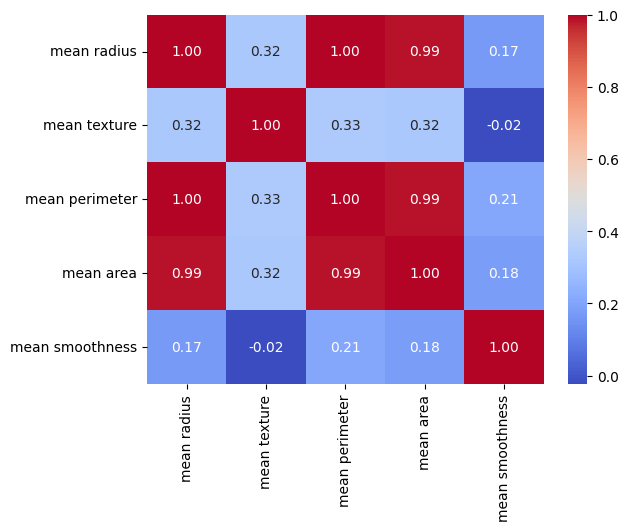

In [367]:
import seaborn as sns
## Plot the relations between the first 5 features in the original dataset.
sns.heatmap(np.corrcoef(X[:5]), annot=True, fmt=".2f", cmap='coolwarm', xticklabels=data.feature_names[:5], yticklabels=data.feature_names[:5])

We can see that some of the features are linearly correlated

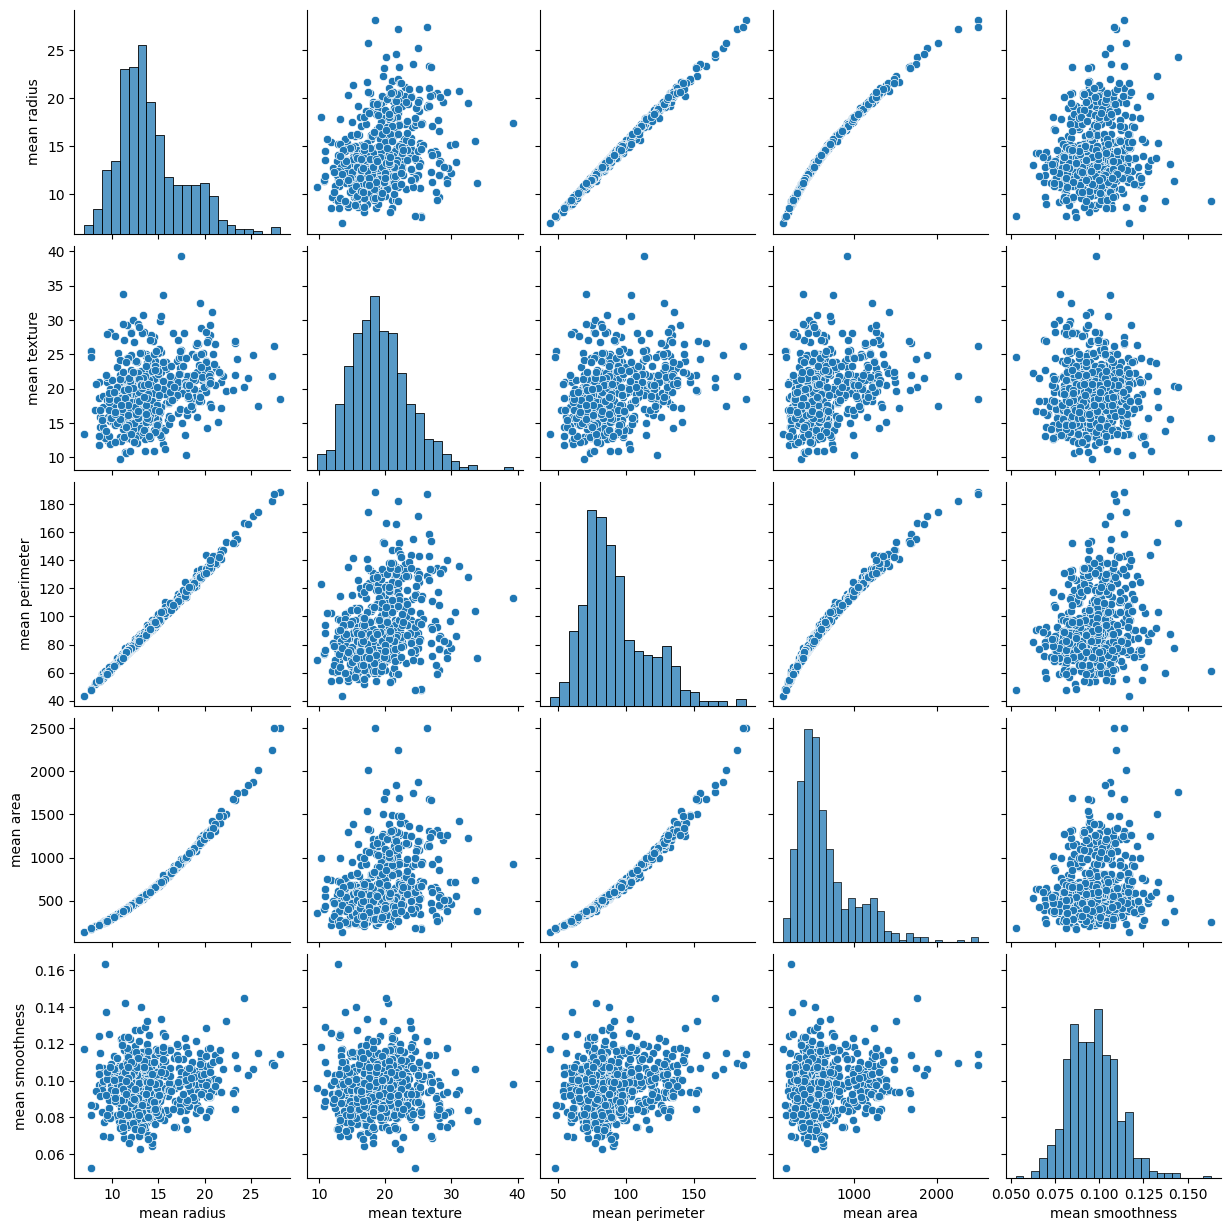

In [257]:
# Plot the relations between the first 5 features in the original dataset.
sns.pairplot(pd.DataFrame(X[:5].T, columns=data.feature_names[:5]))

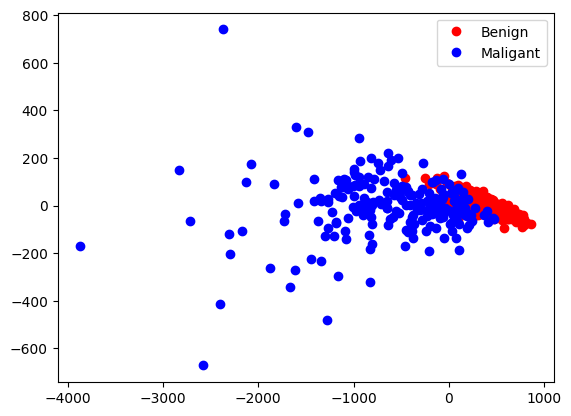

In [393]:
plt.plot(Phi[Y == 1, 0], Phi[Y == 1, 1], 'ro', label='Benign')
plt.plot(Phi[Y == 0, 0], Phi[Y == 0, 1], 'bo', label='Maligant')
plt.legend()

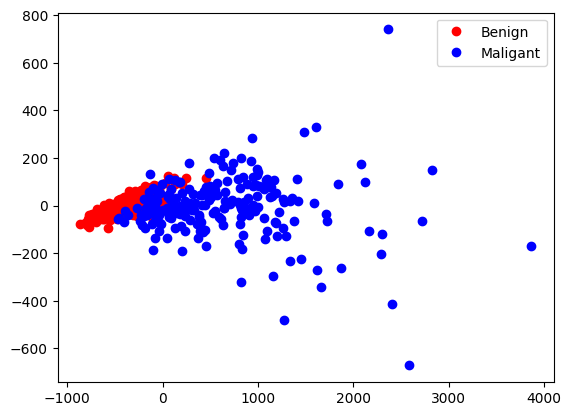

In [394]:
plt.plot(Phi_2[Y == 1, 0], Phi_2[Y == 1, 1], 'ro', label='Benign')
plt.plot(Phi_2[Y == 0, 0], Phi_2[Y == 0, 1], 'bo', label='Maligant')
plt.legend()

In the previous point we could clearly see the correlation between each feature, instead making the plot in the principal component space, we can appreciate better the separation between the classes. The principal component space is a space where the axis are the directions of highest variance in the dataset

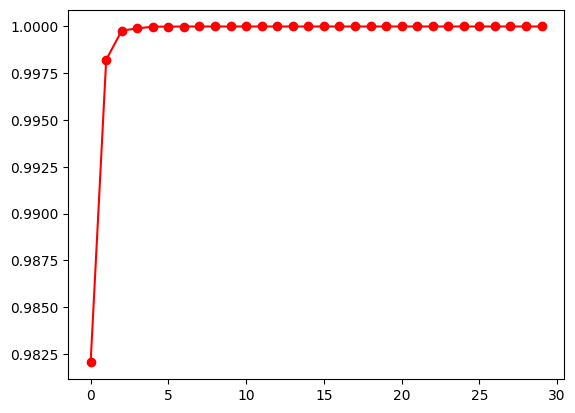

In [263]:
## The explained variance ratio of the top 2 principal components

# Compute explained variance ratio
plt.plot(np.cumsum(s**2)/np.sum(s**2), 'ro-')

As we can see from the graph the first two principal components explain more that 99.75% of the variance in the dataset.

In [ ]:
lost_variance = 1 - np.sum(s[:2]**2)/np.sum(s**2)

In [ ]:
print("lost variance:", lost_variance)

lost variance: 0.0017788386258273947


## Exercise 02

In [ ]:
import numpy as np
data = np.loadtxt("Concrete_Data.csv",delimiter=",")
A = data[:,:-1]
b = data[:,-1]
mean_A = np.mean(A,axis = 0)
A = A - mean_A
std_A = np.std(A, axis = 0)
A = A / std_A

In [ ]:
print("A:", A.shape)
print("b:", b.shape)

A: (1030, 8)
b: (1030,)


In [ ]:
import jax.numpy as jnp
import jax

def least_squares(X, y, w):
    return jnp.mean((jnp.dot(X, w) - y)**2)

In [ ]:
## we can use the Moore Penrose pseudo-inverse to solve the least squares problem
w_min= jnp.linalg.pinv(A) @ b
print(w_min)

[[12.514235 ]
 [ 8.95712  ]
 [ 5.624801 ]
 [-3.1998336]
 [ 1.7448573]
 [ 1.4055912]
 [ 1.6179986]
 [ 7.211895 ]]


In [ ]:
## Implementing the Stochastic Gradient Descent algorithm

loss_jit = jax.jit(least_squares) # N.B here the assumption is that the prototype is loss(x, y, params)
grad_jit = jax.jit(jax.grad(loss_jit, argnums=2)) # argnums=2 means that we compute the gradient on 3rd argument

w0 = jnp.zeros(A.shape[1]).reshape(-1, 1)

In [ ]:
print('w0', w0.shape)
b= b.reshape(-1, 1)
print(loss_jit(A, b, w0))
print(grad_jit(A, b, w0))

w0 (8, 1)
1561.7373
[[-16.625229 ]
 [ -4.502667 ]
 [  3.5317125]
 [  9.672403 ]
 [-12.225312 ]
 [  5.508032 ]
 [  5.585064 ]
 [-10.982798 ]]


In [ ]:
########## PROBLEM DATA ################
num_epochs = 10000
learning_rate = 0.01
batch_size = 10
n_training_points = A.shape[0]
########################################

history_train = list()
# history_validation = list()
# indices_set = set()


# iterating for different constant learning rates
while learning_rate > 1e-5:
    w = w0
    history_train = list()
    for epoch in range(num_epochs):
        #   learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay)) # learning rate decay
        idxs = np.random.choice(n_training_points, batch_size)  # calculates the batch indices
        # indices_set.update(idxs)

        grads = grad_jit(A[idxs,:], b[idxs,:], w)
        w = w - learning_rate * grads

        history_train.append(loss_jit(A, b, w))
        # history_validation.append(loss_jit(x_validation, y_validation, params))
    print('loss:', history_train[-1])
    learning_rate *= 0.1

loss: 1397.2328
loss: 1391.5295
loss: 1401.5447


In [343]:
# fixed learning rate scenario
########## PROBLEM DATA ################
num_epochs = 10000
learning_rate = 1e-2
batch_size = 100
n_training_points = A.shape[0]
########################################

w_history = list()
history_train = list()


w = w0

for epoch in range(num_epochs):
    #   learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay)) # learning rate decay
    idxs = np.random.choice(n_training_points, batch_size)  # calculates the batch indices
    # indices_set.update(idxs)

    grads = grad_jit(A[idxs,:], b[idxs,:], w)
    w = w - learning_rate * grads
    w_history.append(w)

    history_train.append(loss_jit(A, b, w))
    # history_validation.append(loss_jit(x_validation, y_validation, params))
print('loss:', history_train[-1])

loss: 1390.851


In [ ]:
print(np.linalg.norm(w - w_min)/np.linalg.norm(w_min))

0.35286424


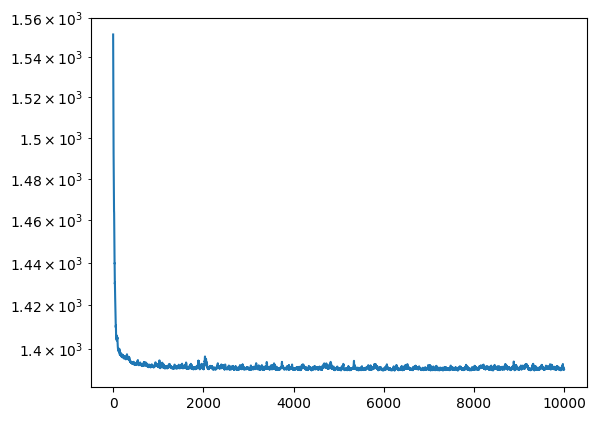

In [344]:
plt.semilogy(history_train)

In [345]:
U, s, Vt = np.linalg.svd(A, full_matrices=False)
s_min = np.min(s)
print(s_min)

5.562738737605571


In [346]:
### Stochastic Gradient Descent modified learning rate

########## PROBLEM DATA ################
num_epochs = 10000
learning_rate_max = 1e-2
batch_size = 100
n_training_points = A.shape[0]
########################################

history_train = list()
w_history_dec = list()
# history_validation = list()
# indices_set = set()

w = w0

for epoch in range(num_epochs):
  learning_rate = learning_rate_max/(s_min * (epoch+1)) # learning rate decay
  idxs = np.random.choice(n_training_points, batch_size)  # calculates the batch indices
  # indices_set.update(idxs)

  grads = grad_jit(A[idxs,:], b[idxs,:], w)
  w = w - learning_rate * grads

  history_train.append(loss_jit(A, b, w))
  w_history_dec.append(w)

print('loss:', history_train[-1])

loss: 1548.9153


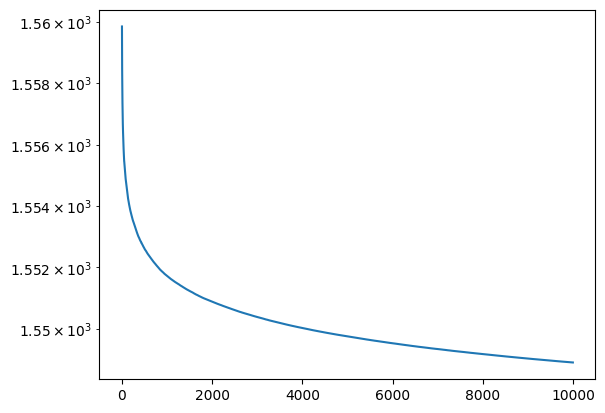

In [347]:
plt.semilogy(history_train)

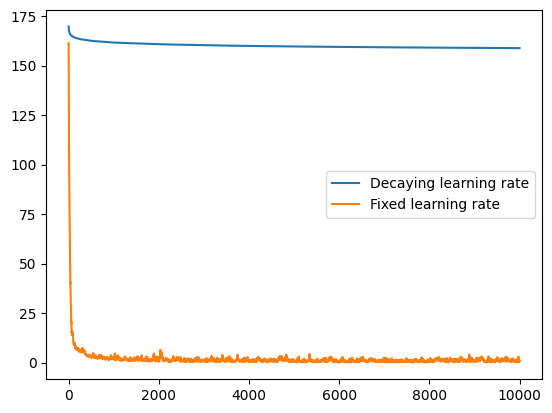

In [348]:
losses_diff = [loss_jit(A, b, w) - loss_jit(A, b, w_min) for w in w_history]
losses_diff_dec = [loss_jit(A, b, w) - loss_jit(A, b, w_min) for w in w_history_dec]

plt.plot(losses_diff_dec, label='Decaying learning rate')
plt.plot(losses_diff, label='Fixed learning rate')
plt.legend()

The learning rate decays too fast, this makes the algorithm to converge too fast and not reach the optimal solution. We can see that the loss function is not decreasing as expected, this is because the learning rate is too high.